# Import Stuff

In [1]:
#%matplotlib nbagg -> Causes crashes
import matplotlib.pyplot as plt
import numpy as np
import qcodes as qc

In [2]:
from qcodes.instrument_drivers.rohde_schwarz import (
    RohdeSchwarzZVB20,
    RohdeSchwarzZNBChannel,
)
from qcodes.dataset import (
    LinSweep,
    Measurement,
    dond,
    experiments,
    initialise_or_create_database_at,
    load_by_run_spec,
    load_or_create_experiment,
    plot_dataset,
)
from qcodes.interactive_widget import experiments_widget

In [3]:
from qcodes.dataset import (
    Measurement,
    initialise_database,
    load_or_create_experiment,
    plot_by_id,
)

initialise_database()
zvb20_experiment = load_or_create_experiment(experiment_name='test_with_zvb20',
                          sample_name="no sample")

# Plotting 2 Datasets

In [38]:
dataset = load_by_run_spec(experiment_name='test_with_zvb20', captured_run_id=54)
dataset1 = load_by_run_spec(experiment_name='test_with_zvb20', captured_run_id=47)
#dataset.get_parameter_data()

Trying to mark a run completed that was already completed.
Trying to mark a run completed that was already completed.


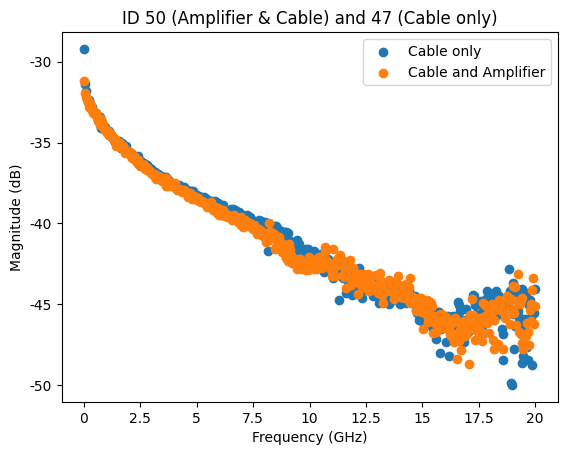

In [39]:
fig, ax = plt.subplots(1)
axes, cbaxes = plot_dataset(dataset1, axes=ax, label='Cable only')
axes, cbaxes = plot_dataset(dataset, axes=ax, label='Cable and Amplifier')
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Magnitude (dB)')
ax.set_title('ID 50 (Amplifier & Cable) and 47 (Cable only)')
plt.legend()
plt.savefig('S21withS12.png', bbox_inches='tight')

# Messing with 2D Dataset

In [72]:
dataset_2d = load_by_run_spec(experiment_name='test_with_zvb20', captured_run_id=34)
dataset_2d.get_parameter_data('VNA_S21_trace')

{'VNA_S21_trace': {'VNA_S21_trace': array([[-12.47379921, -14.36621043, -15.72285666, ..., -11.47910404,
          -10.49412046, -11.29979087],
         [-12.47379921, -14.36621043, -15.72285666, ..., -11.47910404,
          -10.49412046, -11.29979087],
         [-12.47379921, -14.36621043, -15.72285666, ..., -11.47910404,
          -10.49412046, -11.29979087],
         ...,
         [-12.47379921, -14.36621043, -15.72285666, ..., -11.47910404,
          -10.49412046, -11.29979087],
         [-12.47379921, -14.36621043, -15.72285666, ..., -11.47910404,
          -10.49412046, -11.29979087],
         [-12.47379921, -14.36621043, -15.72285666, ..., -11.47910404,
          -10.49412046, -11.29979087]]),
  'VNA_S21_power': array([[-50., -50., -50., ..., -50., -50., -50.],
         [-49., -49., -49., ..., -49., -49., -49.],
         [-48., -48., -48., ..., -48., -48., -48.],
         ...,
         [-33., -33., -33., ..., -33., -33., -33.],
         [-32., -32., -32., ..., -32., -32., -32.],

# Plot Dataset

In [63]:
dataset_load = load_by_run_spec(experiment_name='test_with_zvb20', captured_run_id=58)

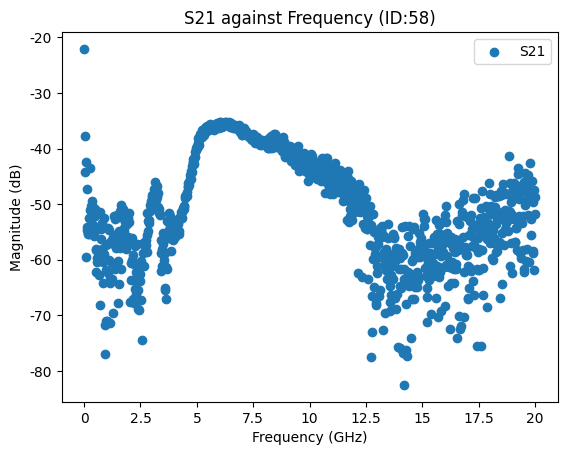

In [65]:
fig, ax = plt.subplots(1)
axes, cbaxes = plot_dataset(dataset_load, axes=ax, label='S21')
#axes, cbaxes = plot_dataset(dataset, axes=ax, label='S21')
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Magnitude (dB)')
ax.set_title('S21 against Frequency (ID:58)')
plt.legend()
plt.savefig('Title.png', bbox_inches='tight')

# Connect to ZVB VNA (Address can be found using NI VISA)

In [4]:
vna = RohdeSchwarzZVB20('VNA', 'GPIB18::18::INSTR')
station = qc.Station(vna)

C:\Users\buddy\miniconda3\envs\qcodes\Lib\site-packages\qcodes\instrument\instrument_base.py:143: QCoDeSDeprecationWarning: Parameter trace_mag_phase on instrument VNA_S11 does not correctly pass kwargs to its baseclass. A Parameter class must take `**kwargs` and forward them to its baseclass.
  warnings.warn(
C:\Users\buddy\miniconda3\envs\qcodes\Lib\site-packages\qcodes\instrument\instrument_base.py:143: QCoDeSDeprecationWarning: Parameter trace_db_phase on instrument VNA_S11 does not correctly pass kwargs to its baseclass. A Parameter class must take `**kwargs` and forward them to its baseclass.
  warnings.warn(
C:\Users\buddy\miniconda3\envs\qcodes\Lib\site-packages\qcodes\instrument\instrument_base.py:143: QCoDeSDeprecationWarning: Parameter trace on instrument VNA_S11 does not correctly pass kwargs to its baseclass. A Parameter class must take `**kwargs` and forward them to its baseclass.
  warnings.warn(
C:\Users\buddy\miniconda3\envs\qcodes\Lib\site-packages\qcodes\instrument\i

Connected to: Rohde&Schwarz ZVB20-2Port (serial:1145101020100272, firmware:3.00) in 0.59s


In [5]:
vna.snapshot()

{'functions': {'reset': {},
  'tooltip_on': {},
  'tooltip_off': {},
  'cont_meas_on': {},
  'cont_meas_off': {},
  'update_display_once': {},
  'update_display_on': {},
  'update_display_off': {},
  'display_sij_split': {},
  'display_single_window': {},
  'display_dual_window': {},
  'rf_off': {},
  'rf_on': {}},
 'submodules': {'channels': {'channels': {'VNA_S11': {'functions': {'set_electrical_delay_auto': {},
      'autoscale': {}},
     'submodules': {},
     'parameters': {'vna_parameter': {'__class__': 'qcodes.parameters.parameter.Parameter',
       'full_name': 'VNA_S11_vna_parameter',
       'value': 'S11',
       'raw_value': "'S11'\n",
       'ts': '2023-05-16 12:11:28',
       'instrument': 'qcodes.instrument_drivers.rohde_schwarz.ZNB.RohdeSchwarzZNBChannel',
       'instrument_name': 'VNA_S11',
       'inter_delay': 0,
       'name': 'vna_parameter',
       'unit': '',
       'label': 'VNA parameter',
       'post_delay': 0},
      'power': {'__class__': 'qcodes.parameter

# S21 Setup Configuration (Frequency Sweep)

In [9]:
vna.channels.power(-50)
vna.rf_on()

In [59]:
vna.channels.S21.start(10e6)
vna.channels.S21.stop(20e9)
vna.channels.S21.npts(1001)
vna.channels.S21.power(-20)
vna.channels.S21.avg(100)
vna.channels.S21.bandwidth(1e3)

In [60]:
vna.rf_on()
meas = Measurement()
meas.register_parameter(vna.channels.S21.trace)
with meas.run() as datasaver:
    get_v = vna.channels.S21.trace.get()
    datasaver.add_result((vna.channels.S21.trace, get_v))

Starting experimental run with id: 58. 


Trying to mark a run completed that was already completed.


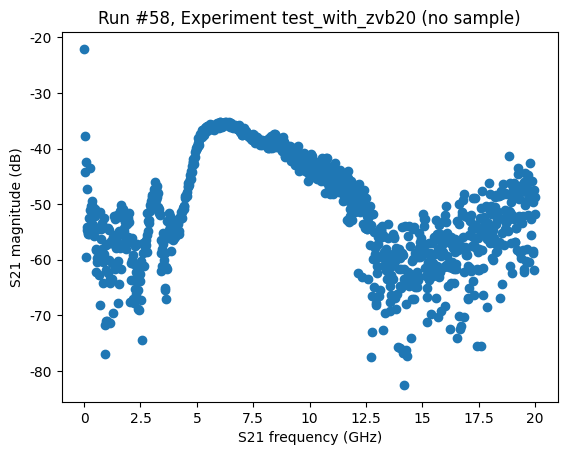

In [61]:
ax, cbax = plot_by_id(datasaver.run_id)

# Power and Frequency Sweep Configuration

In [58]:
vna.rf_on()
vna.channels.S21.start(1e9)
vna.channels.S21.stop(15e9)
vna.channels.S21.npts(100)
vna.channels.S21.avg(10)

In [59]:
meas = Measurement()
meas.register_parameter(vna.channels.S21.power)
meas.register_parameter(vna.channels.S21.trace, setpoints=(vna.channels.S21.power,))
with meas.run() as datasaver:
    for power in range(-50, -30, 1):
        vna.channels.S21.power.set(power)
        get_v = vna.channels.S21.trace.get()
        datasaver.add_result((vna.channels.S21.power, power),
                             (vna.channels.S21.trace, get_v))

Starting experimental run with id: 34. 


Trying to mark a run completed that was already completed.


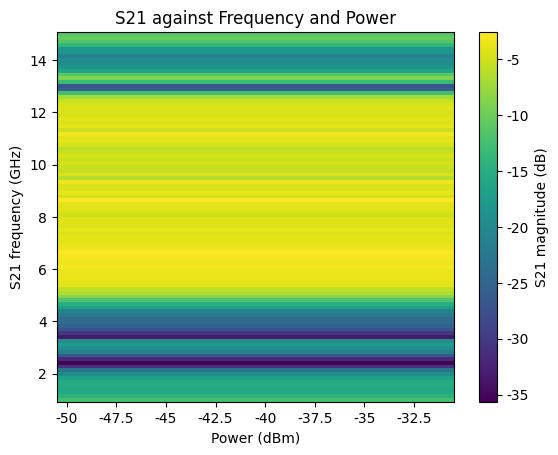

In [60]:
ax, cbax = plot_by_id(datasaver.run_id)
#plt.ylabel('Frequency (GHz)')
#plt.xlabel('Power (dBm)')
plt.title('S21 against Frequency and Power')
plt.savefig('S21Colour.png', bbox_inches='tight')

# Using Widget

In [46]:
experiments_widget(sort_by="timestamp")